In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


<h3>Exploratory Data Analysis</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#look at statistical feature of dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
#check missing values
def missing_data(data):
    miss = data.isna().sum()
    miss = miss[miss>0]
    miss_p = miss/data.shape[0]*100
    
    return pd.DataFrame({'Missings': miss, 'Proportion of Missings (%)': miss_p})

missing_data(df)

,Missings,Proportion of Missings (%)
Income,24,1.071429


<p>We have 24 missing values on "Income" column which only account for 1% of our dataset</p>

In [6]:
#check unique values of each column
def check_data(data):
    for column in data:
        unique_values = np.unique(data[column])
        nr_values = len(unique_values)
        if nr_values <= 10:
            print('The number of unique values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
        else:
            print('The number of unique values for feature {} is: {}'.format(column, nr_values))
            
check_data(df)

The number of unique values for feature ID is: 2240
The number of unique values for feature Year_Birth is: 59
The number of unique values for feature Education is: 5 -- ['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
The number of unique values for feature Marital_Status is: 8 -- ['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']
The number of unique values for feature Income is: 1998
The number of unique values for feature Kidhome is: 3 -- [0 1 2]
The number of unique values for feature Teenhome is: 3 -- [0 1 2]
The number of unique values for feature Dt_Customer is: 663
The number of unique values for feature Recency is: 100
The number of unique values for feature MntWines is: 776
The number of unique values for feature MntFruits is: 158
The number of unique values for feature MntMeatProducts is: 558
The number of unique values for feature MntFishProducts is: 182
The number of unique values for feature MntSweetProducts is: 177
The number of unique values for 

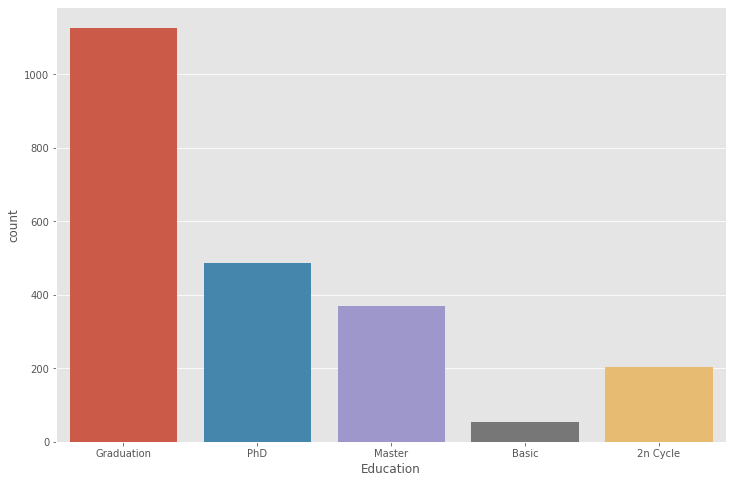

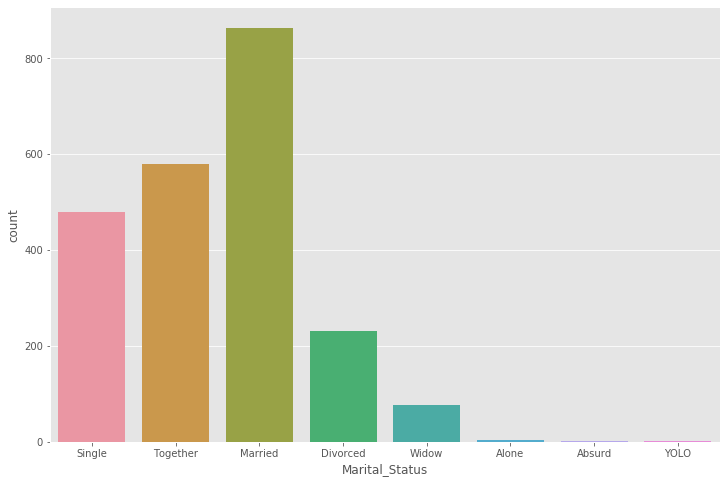

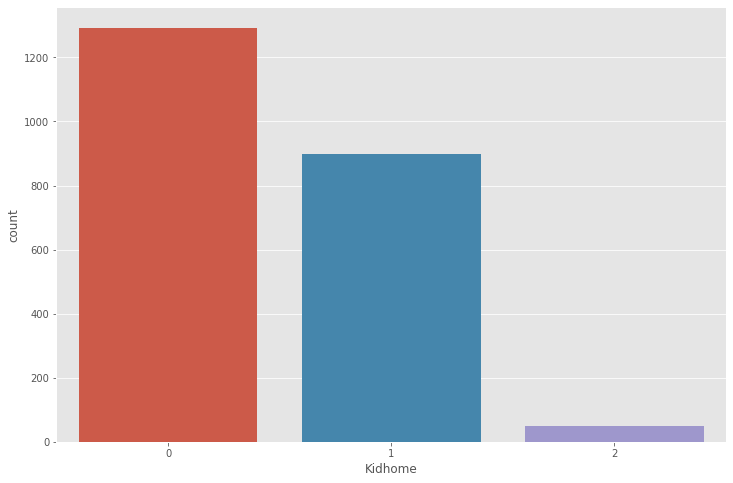

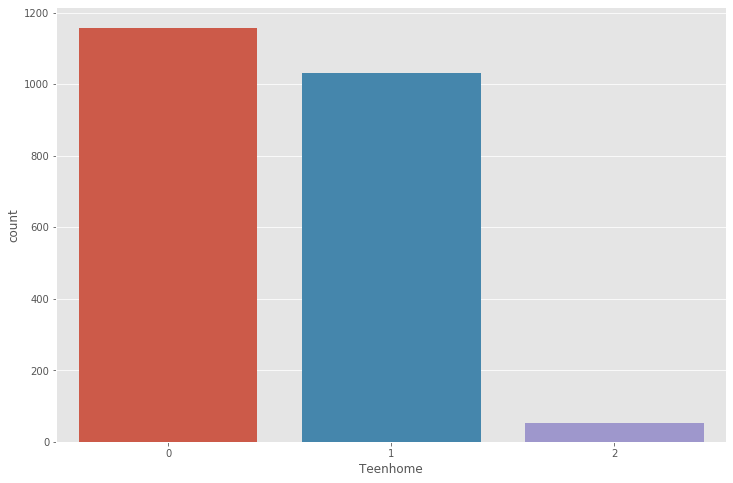

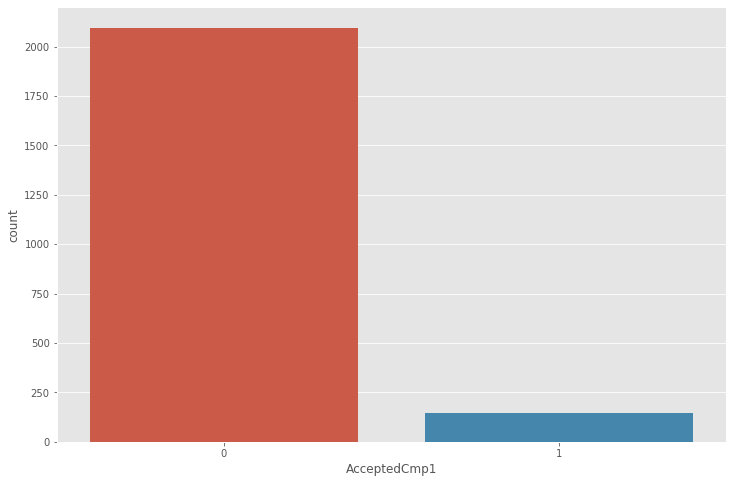

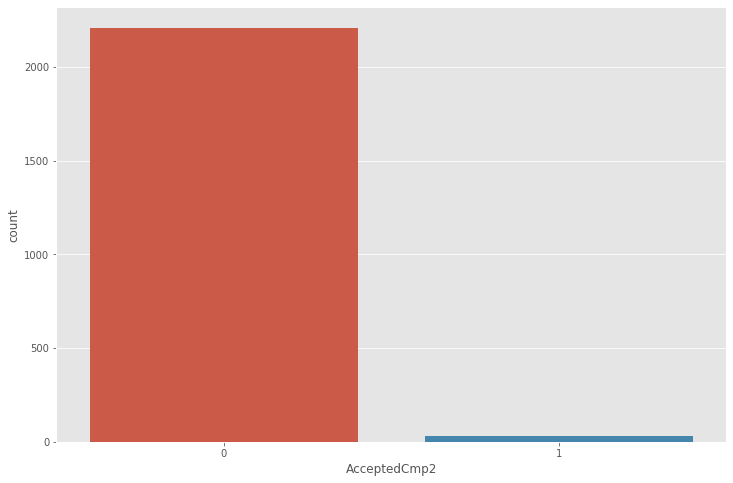

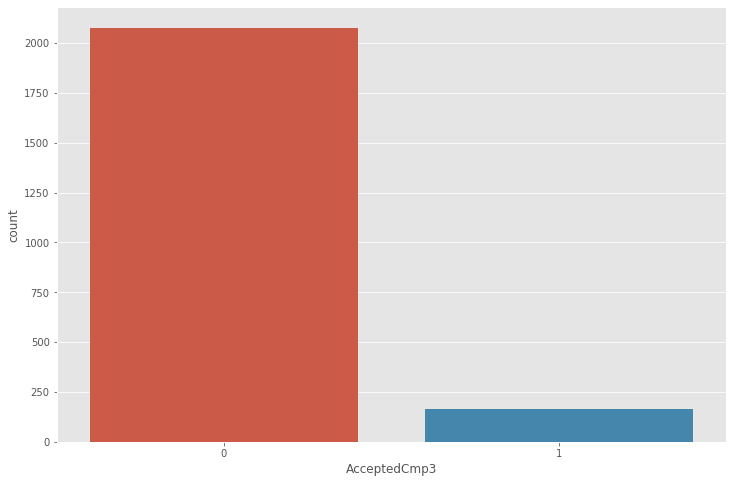

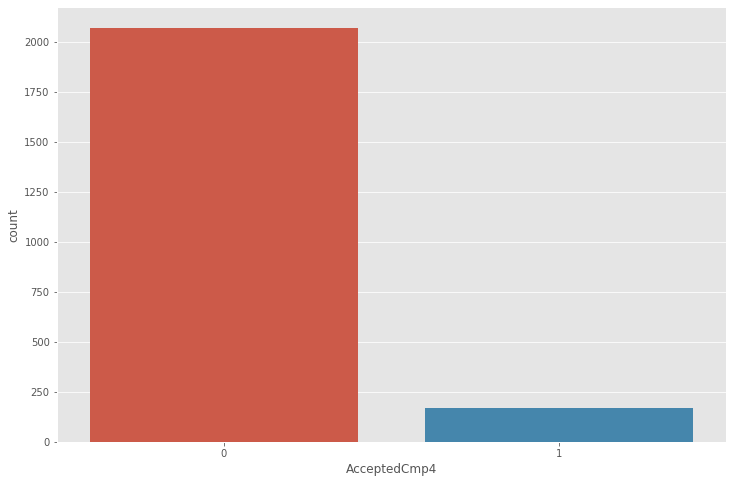

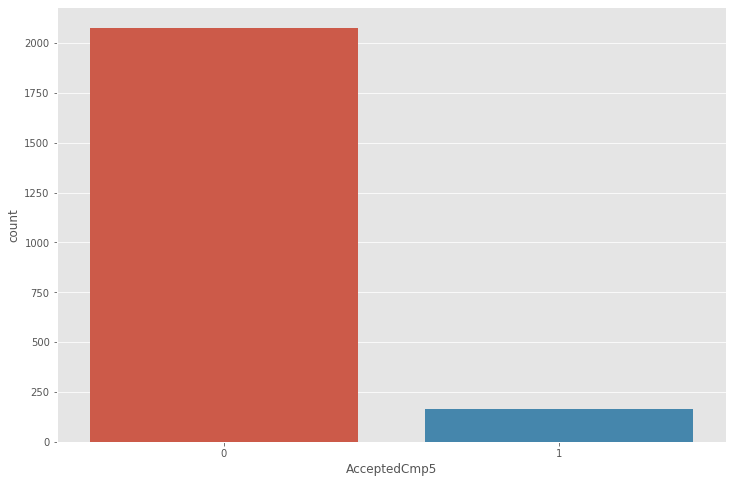

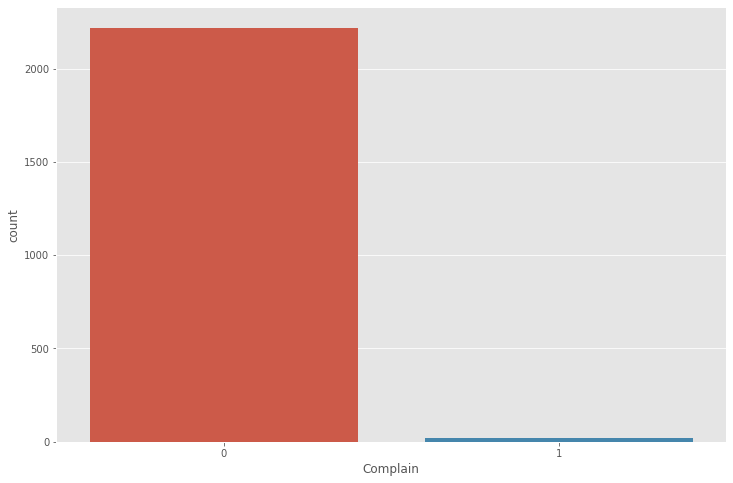

In [7]:
#check distribution of categorical variables
cat_features = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']

for f in cat_features:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=f, data=df)
    plt.show()

In [8]:
#distribution of categorical values in numbers
fl = []
for f in cat_features:
    fl.append(df.groupby([f]).agg({'Response': 'count'}))
    fm = pd.concat(fl, keys=cat_features)
    fm = pd.DataFrame({'Number of Observations': fm.iloc[:,0]})
    
fm

Number of Observations
Education      2n Cycle                       203
               Basic                           54
               Graduation                    1127
               Master                         370
               PhD                            486
Marital_Status Absurd                           2
               Alone                            3
               Divorced                       232
               Married                        864
               Single                         480
               Together                       580
               Widow                           77
               YOLO                             2
Kidhome        0                             1293
               1                              899
               2                               48
Teenhome       0                             1158
               1                             1030
               2                               52
AcceptedCmp1   0                             2096
               1                              144
AcceptedCmp2   0                             2210
               1                               30
AcceptedCmp3   0                             2077
               1                              163
AcceptedCmp4   0                             2073
               1                              167
AcceptedCmp5   0                             2077
               1                              163
Complain       0                             2219
               1                               21

<p>From "Marital_Status" column there are values like 'Alone', 'Absurd', 'YOLO' which seems doubtful. Let's check them further</p>

In [9]:
df[(df['Marital_Status'] == 'Alone') | (df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,8,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,5,1,0,0,0,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,6,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


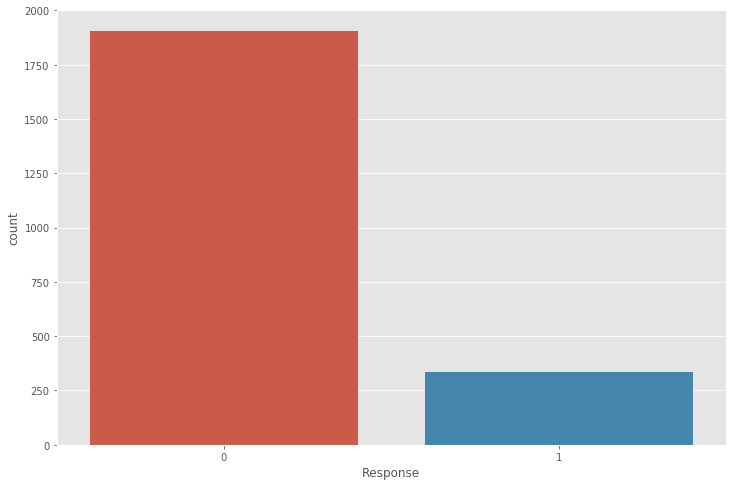

In [10]:
#check the distribution of our target variable
plt.figure(figsize=(12, 8))
sns.countplot(x='Response', data=df)
plt.show()

In [11]:
#get a series of days since Dt_Customer until then end of 2014 because this data was taken in 2014
def days_since(dates_series, date_format):
    n = len(dates_series)
    result = [0] * n
    for i in range(n):
        result[i] = (pd.to_datetime('2014-12-31') - datetime.strptime(dates_series[i], '%Y-%m-%d')).days
    return result

df['Days_Customer'] = days_since(list(df['Dt_Customer']), '%Y-%m-%d')

In [12]:
#drop null values and unnecessary columns
df = df[(df['Marital_Status'] != 'Alone') & (df['Marital_Status'] != 'Absurd') & (df['Marital_Status'] != 'YOLO')]
df = df.dropna()
df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,848
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,298
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,497
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,324
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,4,5,0,0,0,0,0,0,0,566
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,5,7,0,0,0,1,0,0,0,204
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,13,6,0,1,0,0,0,0,0,340
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,10,3,0,0,0,0,0,0,0,341


In [16]:
#correlation matrix between numerical variables
def magnify():
    return [dict(selector='th',
                props=[('font-size', '7pt')]),
           dict(selector='td',
               props=[('padding', '0em 0em')]),
           dict(selector='th:hover',
               props=[('font-size', '12pt')]),
           dict(selector='tr:hover td:hover',
               props=[('max-width', '200px'),
                     ('font-size', '12pt')])]

def corr_matrix(data):
    corr = data.corr()
    cmap = sns.diverging_palette(5, 250, as_cmap=True)
    vis = corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption('Hover to magnify')\
    .set_precision(2)\
    .set_table_styles(magnify())
    
    return vis

num_features = df.drop(cat_features, axis=1)
num_features = num_features.drop('Response', axis=1)
corr_matrix(num_features)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer
Year_Birth,1.00,-0.16,-0.02,-0.16,-0.02,-0.03,-0.04,-0.02,-0.07,-0.06,-0.15,-0.12,-0.13,0.13,0.02
Income,-0.16,1.00,-0.00,0.58,0.43,0.58,0.44,0.44,0.32,-0.08,0.39,0.59,0.53,-0.55,-0.02
Recency,-0.02,-0.00,1.00,0.02,-0.01,0.02,-0.00,0.02,0.02,0.00,-0.00,0.02,-0.00,-0.02,0.03
MntWines,-0.16,0.58,0.02,1.00,0.39,0.57,0.40,0.39,0.39,0.01,0.55,0.64,0.64,-0.32,0.17
MntFruits,-0.02,0.43,-0.01,0.39,1.00,0.55,0.59,0.57,0.39,-0.13,0.30,0.48,0.46,-0.42,0.07
MntMeatProducts,-0.03,0.58,0.02,0.57,0.55,1.00,0.57,0.54,0.36,-0.12,0.31,0.74,0.49,-0.54,0.09
MntFishProducts,-0.04,0.44,-0.00,0.40,0.59,0.57,1.00,0.59,0.42,-0.14,0.30,0.53,0.46,-0.44,0.08
MntSweetProducts,-0.02,0.44,0.02,0.39,0.57,0.54,0.59,1.00,0.36,-0.12,0.34,0.50,0.46,-0.42,0.08
MntGoldProds,-0.07,0.32,0.02,0.39,0.39,0.36,0.42,0.36,1.00,0.05,0.41,0.44,0.39,-0.24,0.16
NumDealsPurchases,-0.06,-0.08,0.00,0.01,-0.13,-0.12,-0.14,-0.12,0.05,1.00,0.24,-0.01,0.07,0.34,0.22


<h3>Modeling</h3>

In [23]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

In [24]:
#split the dataset into training and testing set
X = df.drop('Response', axis=1)
y = df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [19]:
#check percentage of response in each dataset
percent_yes_training = 100*y_train.sum()/len(y_train)
percent_yes_testing = 100*y_test.sum()/len(y_test)

print('Percentage of Respond in Training Set\t: {:0.2f}%.'.format(percent_yes_training))
print('Percentage of Respond in Testing Set\t: {:0.2f}%.'.format(percent_yes_testing))

Percentage of Respond in Training Set	: 14.94%.
Percentage of Respond in Testing Set	: 14.93%.


<h4>Adaboost Classifier</h4>

In [26]:
#fit and evaluate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=200, learning_rate=0.05)
adb_model.fit(x_train, y_train)

y_pred_train = adb_model.predict(x_train)
y_pred_test = adb_model.predict(x_test)

adb_score_training = accuracy_score(y_train, y_pred_train)*100
adb_score_testing = accuracy_score(y_test, y_pred_test)*100

print('Adaboost:\tAccuracy, Training Set\t: {:0.2f}%'.format(adb_score_training))
print('Adaboost:\tAccuracy, Testing Set\t: {:0.2f}%'.format(adb_score_testing))

Adaboost:	Accuracy, Training Set	: 99.42%
Adaboost:	Accuracy, Testing Set	: 87.48%


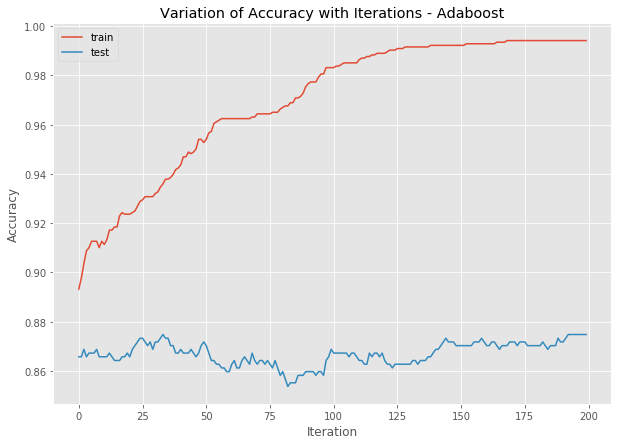

In [28]:
#plot iteration based score
train_scores = list(adb_model.staged_score(x_train, y_train))
test_scores = list(adb_model.staged_score(x_test, y_test))

plt.figure(figsize=(10, 7))
plt.plot(train_scores, label='train')
plt.plot(test_scores, label='test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Iterations - Adaboost')
plt.legend();

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:55<00:00,  4.00s/it]


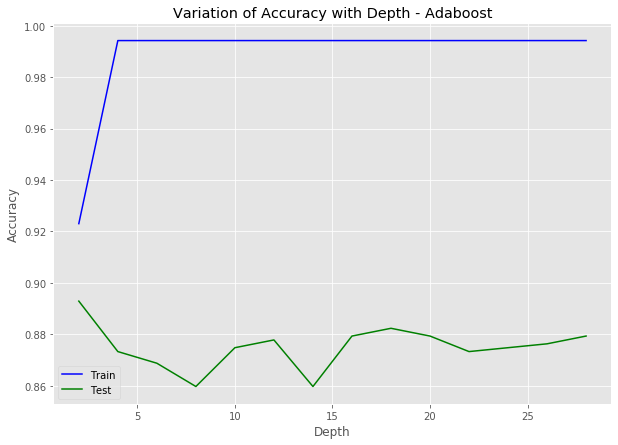

In [30]:
#plot depth based score
from tqdm import tqdm
score_train, score_test, depth_start, depth_end = {}, {}, 2, 30

for i in tqdm(range(depth_start, depth_end, 2)):
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), n_estimators=200, learning_rate=0.05)
    model.fit(x_train, y_train)
    score_train[i] = accuracy_score(y_train, model.predict(x_train))
    score_test[i] = accuracy_score(y_test, model.predict(x_test))
    
lists1 = sorted(score_train.items())
lists2 = sorted(score_test.items())
x1, y1 = zip(*lists1)
x2, y2 = zip(*lists2)
plt.figure(figsize=(10, 7))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.title('Variation of Accuracy with Depth - Adaboost')
plt.plot(x1, y1, 'b-', label='Train')
plt.plot(x2, y2, 'g-', label='Test')
plt.legend()
plt.show()

<p>From the accuracy graph above, we can see that best accuracy is yielded with max_depth=2</p>

In [31]:
adb_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate=0.05)
adb_model.fit(x_train, y_train)

y_pred_train = adb_model.predict(x_train)
y_pred_test = adb_model.predict(x_test)

adb_score_training = accuracy_score(y_train, y_pred_train)*100
adb_score_testing = accuracy_score(y_test, y_pred_test)*100

print('Adaboost:\tAccuracy, Training Set\t: {:0.2f}%'.format(adb_score_training))
print('Adaboost:\tAccuracy, Testing Set\t: {:0.2f}%'.format(adb_score_testing))

Adaboost:	Accuracy, Training Set	: 92.30%
Adaboost:	Accuracy, Testing Set	: 89.29%


<h4>Gradient Boosting Classifier</h4>

In [36]:
#fit and evaluate
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=2, max_features=12, random_state=0)
gb_model.fit(x_train, y_train)

y_pred_train = gb_model.predict(x_train)
y_pred_test = gb_model.predict(x_test)

gb_score_training = accuracy_score(y_train, y_pred_train)*100
gb_score_testing = accuracy_score(y_test, y_pred_test)*100

print('Gradient Boosting:\tAccuracy, Training Set\t: {:0.2f}%'.format(gb_score_training))
print('Gradient Boosting:\tAccuracy, Testing Set\t: {:0.2f}%'.format(gb_score_testing))

Gradient Boosting:	Accuracy, Training Set	: 91.91%
Gradient Boosting:	Accuracy, Testing Set	: 89.44%


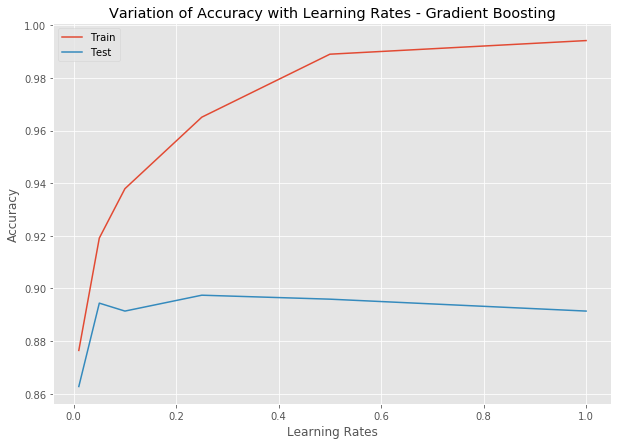

In [37]:
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 1]
train_results = []
test_results = []

for eta in learning_rates:
    model = GradientBoostingClassifier(n_estimators=200, learning_rate=eta, max_depth=2, max_features=12, random_state=0)
    model.fit(x_train, y_train)
    train_results.append(accuracy_score(y_train, model.predict(x_train)))
    test_results.append(accuracy_score(y_test, model.predict(x_test)))
    
plt.figure(figsize=(10, 7))
plt.plot(learning_rates, train_results, label='Train')
plt.plot(learning_rates, test_results, label='Test')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Learning Rates - Gradient Boosting')
plt.legend();

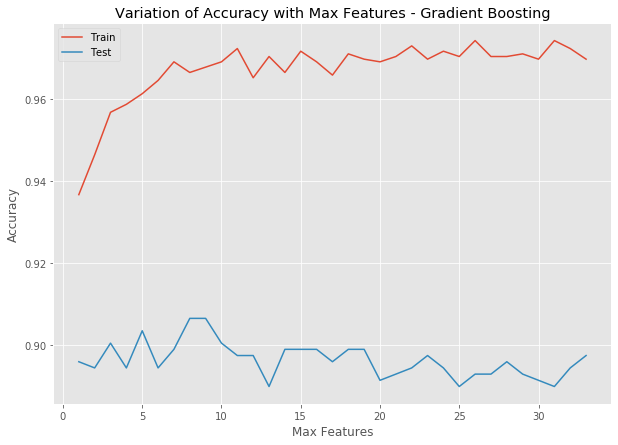

In [38]:
max_features = list(range(1, df.shape[1]))
train_results = []
test_results = []

for f in max_features:
    model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.25, max_depth=2, max_features=f, random_state=0)
    model.fit(x_train, y_train)
    train_results.append(accuracy_score(y_train, model.predict(x_train)))
    test_results.append(accuracy_score(y_test, model.predict(x_test)))
    
plt.figure(figsize=(10, 7))
plt.plot(max_features, train_results, label='Train')
plt.plot(max_features, test_results, label='Test')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max Features - Gradient Boosting')
plt.legend();

<p>From the accuracy graphs above, we can see that highest accuracy is yielded with learning_rate=0.25 and max_features=9</p>

In [39]:
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.25, max_depth=2, max_features=9, random_state=0)
gb_model.fit(x_train, y_train)

y_pred_train = gb_model.predict(x_train)
y_pred_test = gb_model.predict(x_test)

gb_score_training = accuracy_score(y_train, y_pred_train)*100
gb_score_testing = accuracy_score(y_test, y_pred_test)*100

print('Gradient Boosting:\tAccuracy, Training Set\t: {:0.2f}%'.format(gb_score_training))
print('Gradient Boosting:\tAccuracy, Testing Set\t: {:0.2f}%'.format(gb_score_testing))

Gradient Boosting:	Accuracy, Training Set	: 96.77%
Gradient Boosting:	Accuracy, Testing Set	: 90.65%


<h4>XGBoost Classifier</h4>

In [55]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

param = {'max_depth': 2,
        'eta': 0.1,
        'silent': 1,
        'objective': 'multi:softprob',
        'num_class': 2}

num_round = 200

xgb_model = xgb.train(param,
                     dtrain,
                     num_round,
                     evals=[(dtrain, 'train')],
                     early_stopping_rounds=20,
                     verbose_eval=20)

preds_train = xgb_model.predict(dtrain)
best_preds_train = np.asarray([np.argmax(line) for line in preds_train])

preds_test = xgb_model.predict(dtest)
best_preds_test = np.asarray([np.argmax(line) for line in preds_test])

xgb_score_training = accuracy_score(y_train, best_preds_train)*100
xgb_score_testing = accuracy_score(y_test, best_preds_test)*100

print('XGBoost:\tAccuracy, Training Set\t: {:0.2f}%'.format(xgb_score_training))
print('XGBoost:\tAccuracy, Testing Set\t: {:0.2f}%'.format(xgb_score_testing))

[0]	train-merror:0.13389
Will train until train-merror hasn't improved in 20 rounds.
[20]	train-merror:0.11966
[40]	train-merror:0.10349
[60]	train-merror:0.09573
[80]	train-merror:0.08991
[100]	train-merror:0.08474
[120]	train-merror:0.08215
[140]	train-merror:0.07697
[160]	train-merror:0.07439
[180]	train-merror:0.06986
[199]	train-merror:0.06727
XGBoost:	Accuracy, Training Set	: 93.27%
XGBoost:	Accuracy, Testing Set	: 90.05%


In [58]:
def model_xgboost(eta):
    param = {'max_depth': 2,
            'eta': eta,
            'silent': 1,
            'objective': 'multi:softprob',
            'num_class': 2}
    num_round = 200
    model = xgb.train(param,
                     dtrain,
                     num_round,
                     evals=[(dtrain, 'train')],
                     early_stopping_rounds=20,
                     verbose_eval=False)
    preds_train = model.predict(dtrain)
    best_preds_train = np.asarray([np.argmax(line) for line in preds_train])
    preds_test = model.predict(dtest)
    best_preds_test = np.asarray([np.argmax(line) for line in preds_test])
    
    train_score = accuracy_score(y_train, best_preds_train)
    test_score = accuracy_score(y_test, best_preds_test)
    
    return train_score, test_score

score_train_xgb, score_test_xgb = {}, {}
for i in np.linspace(0.1, 1.1, 10):
    train_xgb, test_xgb = model_xgboost(i)
    score_train_xgb[i] = train_xgb
    score_test_xgb[i] = test_xgb

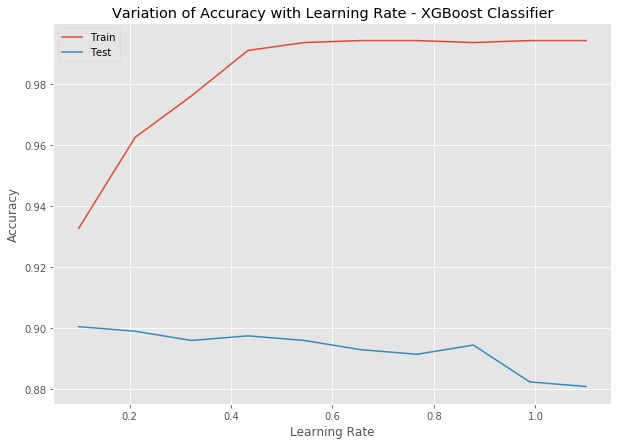

In [59]:
lists1 = sorted(score_train_xgb.items())
lists2 = sorted(score_test_xgb.items())
x3, y3 = zip(*lists1)
x4, y4 = zip(*lists2)
plt.figure(figsize=(10,7))
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.title('Variation of Accuracy with Learning Rate - XGBoost Classifier')
plt.plot(x3, y3, label='Train')
plt.plot(x4, y4, label='Test')
plt.legend()
plt.show()

<p>From graph above, we can see that the best accuracy is yielded with learning_rate=0.1</p>

<h4>Comparing performance between Adaboost, Gradient Boosting, and XGBoost</h4>

In [64]:
print('Adaboost:\tAccuracy, Training Set\t: {:0.2f}%'.format(adb_score_training))
print('Adaboost:\tAccuracy, Testing Set\t: {:0.2f}%'.format(adb_score_testing))

print('\nGradient Boosting:\tAccuracy, Training Set\t: {:0.2f}%'.format(gb_score_training))
print('Gradient Boosting:\tAccuracy, Testing Set\t: {:0.2f}%'.format(gb_score_testing))

print('\nXGBoost:\tAccuracy, Training Set\t: {:0.2f}%'.format(xgb_score_training))
print('XGBoost:\tAccuracy, Testing Set\t: {:0.2f}%'.format(xgb_score_testing))

Adaboost:	Accuracy, Training Set	: 92.30%
Adaboost:	Accuracy, Testing Set	: 89.29%

Gradient Boosting:	Accuracy, Training Set	: 96.77%
Gradient Boosting:	Accuracy, Testing Set	: 90.65%

XGBoost:	Accuracy, Training Set	: 93.27%
XGBoost:	Accuracy, Testing Set	: 90.05%
